In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_csv("housing_price_dataset.csv")
train, test = train_test_split(train, test_size=0.2, random_state=42)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
display(train.head())
display(test.head())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2498,2,3,Rural,2021,288178.195769
1,2380,5,3,Urban,1977,374155.921378
2,2274,5,2,Urban,1957,242571.549240
3,2215,5,1,Suburb,1977,150048.317779
4,2078,2,3,Suburb,1962,241134.908315


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,1894,5,1,Rural,1975,170835.035713
1,1001,5,3,Suburb,1963,126913.469998
2,2264,4,3,Suburb,1964,246611.883092
3,2299,5,1,Suburb,1999,244250.462969
4,2651,2,1,Suburb,1951,271127.650112


In [7]:
import missingno as msno

Train


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Test


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

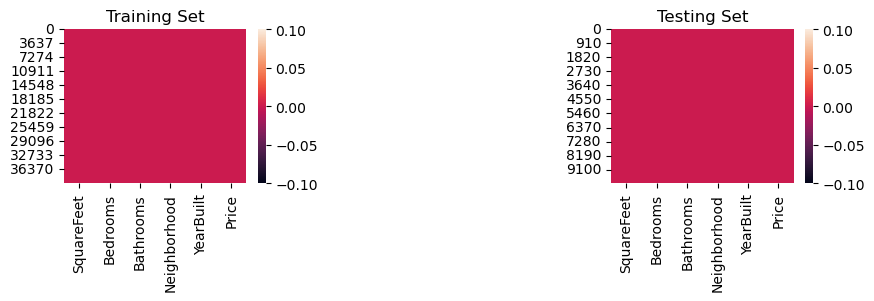

In [14]:
print('Train')
display(train.isnull().sum())
print('Test')
display(test.isnull().sum())

plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.heatmap(test.isnull())
plt.show()

<Axes: >

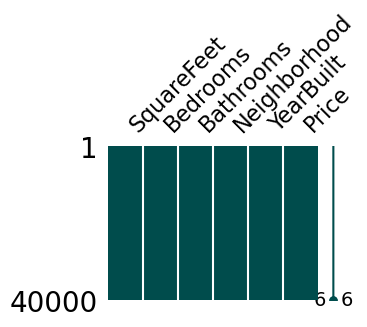

In [9]:
msno.matrix(df=train, figsize=(3,2), color=(0,.3,.3))

Train dataset is no Missing values in DataFrame.

<Axes: >

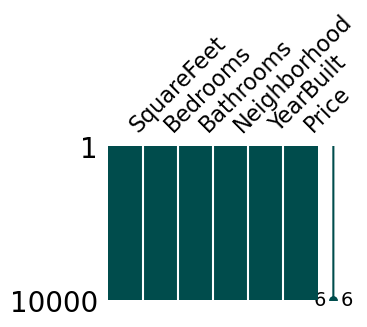

In [10]:
msno.matrix(df=test, figsize=(3,2), color=(0,.3,.3))

Test dataset is no Missing values in DataFrame.

In [13]:
print('Train')
display(train.info())
print('Test')
display(test.info())

Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    40000 non-null  int64  
 1   Bedrooms      40000 non-null  int64  
 2   Bathrooms     40000 non-null  int64  
 3   Neighborhood  40000 non-null  object 
 4   YearBuilt     40000 non-null  int64  
 5   Price         40000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ MB


None

Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    10000 non-null  int64  
 1   Bedrooms      10000 non-null  int64  
 2   Bathrooms     10000 non-null  int64  
 3   Neighborhood  10000 non-null  object 
 4   YearBuilt     10000 non-null  int64  
 5   Price         10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


None

- Train data have 40000 samples, with no-null values
- Test data have 10000 samples, with no-null values.
- We also can see that Neighborhood is object and must do the conversion.

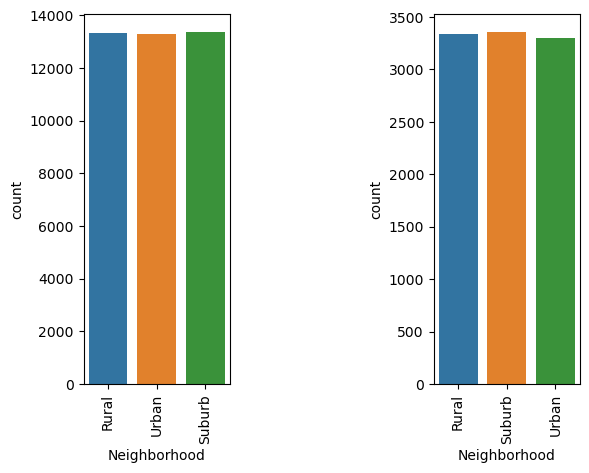

In [18]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Neighborhood"])
plt.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = test["Neighborhood"])
plt.xticks(rotation = 90);
plt.show()

Using visualization, you can see that Neighborhood has three categories

In [19]:
train["Neighborhood"] = train["Neighborhood"].replace({'Rural':1,'Urban':2,'Suburb':3})
test["Neighborhood"] = test["Neighborhood"].replace({'Rural':1,'Urban':2,'Suburb':3})

display(train)
display(test)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2498,2,3,1,2021,288178.195769
1,2380,5,3,2,1977,374155.921378
2,2274,5,2,2,1957,242571.549240
3,2215,5,1,3,1977,150048.317779
4,2078,2,3,3,1962,241134.908315
...,...,...,...,...,...,...
39995,2166,5,3,3,1996,324396.846219
39996,2463,4,1,2,1953,319266.944411
39997,2812,4,2,2,2010,248092.662727
39998,2188,3,1,2,1979,132414.177622


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,1894,5,1,1,1975,170835.035713
1,1001,5,3,3,1963,126913.469998
2,2264,4,3,3,1964,246611.883092
3,2299,5,1,3,1999,244250.462969
4,2651,2,1,3,1951,271127.650112
...,...,...,...,...,...,...
9995,2005,3,3,2,1966,199265.817701
9996,1725,4,2,3,1960,241869.621812
9997,2885,3,2,2,1980,352184.123976
9998,1674,5,2,2,1967,244830.805238


##### Convert the three neighboring categories, use replace function.

In [20]:
df=train._append(test,ignore_index=True)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2498,2,3,1,2021,288178.195769
1,2380,5,3,2,1977,374155.921378
2,2274,5,2,2,1957,242571.549240
3,2215,5,1,3,1977,150048.317779
4,2078,2,3,3,1962,241134.908315
...,...,...,...,...,...,...
49995,2005,3,3,2,1966,199265.817701
49996,1725,4,2,3,1960,241869.621812
49997,2885,3,2,2,1980,352184.123976
49998,1674,5,2,2,1967,244830.805238


Combine train dataset and test dataset , for the purpose of data analysis

In [22]:
train_feature = train.columns.drop('Price').tolist()
train_feature 

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']

In [24]:
import plotly.express as px

In [25]:
train[train_feature].describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='BuPu')\
        .background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
SquareFeet,40000.000000,2005.959300,575.235245,1000.000000,1512.000000,2008.000000,2506.000000,2999.000000
Bedrooms,40000.000000,3.503100,1.115043,2.000000,3.000000,4.000000,4.000000,5.000000
Bathrooms,40000.000000,1.997200,0.816002,1.000000,1.000000,2.000000,3.000000,3.000000
Neighborhood,40000.000000,2.000750,0.816986,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,40000.000000,1985.390125,20.687968,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000


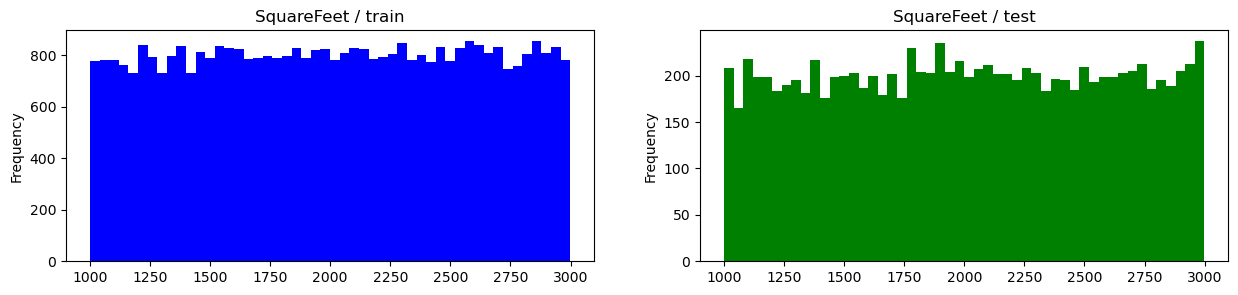

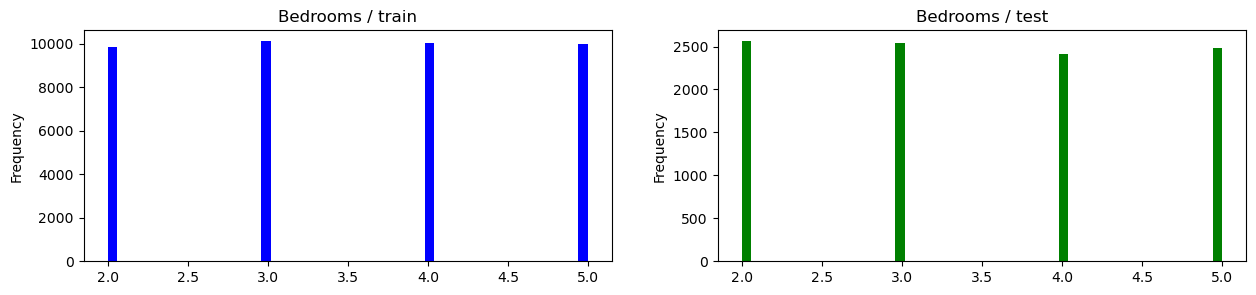

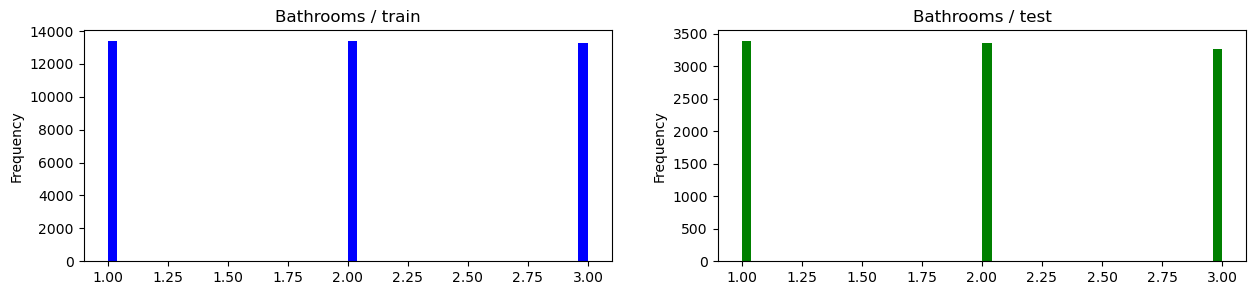

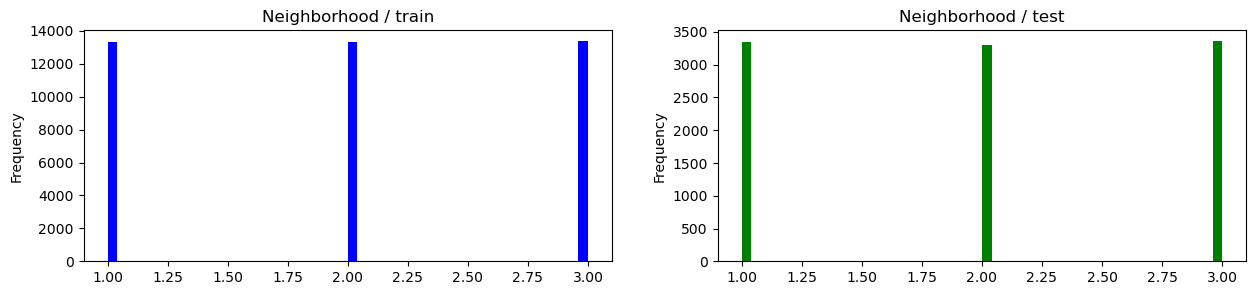

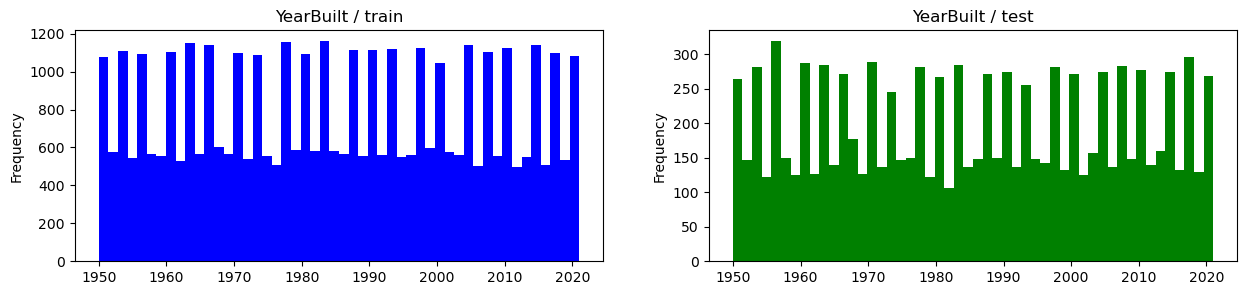

In [26]:
for feat in train_feature:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    train[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / train')
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test[feat].plot(kind='hist', bins=50, color='green')
    plt.title(feat + ' / test')
    plt.show()

Observe the data distribution of train dataset and test dataset at the same time

In [27]:
print("Skewness: %f" % df['SquareFeet'].skew())
print("Kurtosis: %f" % df['SquareFeet'].kurt())
print("Skewness: %f" % df['Bedrooms'].skew())
print("Kurtosis: %f" % df['Bedrooms'].kurt())
print("Skewness: %f" % df['Bathrooms'].skew())
print("Kurtosis: %f" % df['Bathrooms'].kurt())
print("Skewness: %f" % df['Neighborhood'].skew())
print("Kurtosis: %f" % df['Neighborhood'].kurt())
print("Skewness: %f" % df['YearBuilt'].skew())
print("Kurtosis: %f" % df['YearBuilt'].kurt())

Skewness: -0.011162
Kurtosis: -1.189926
Skewness: 0.004640
Kurtosis: -1.356057
Skewness: 0.008408
Kurtosis: -1.497577
Skewness: -0.001655
Kurtosis: -1.502886
Skewness: 0.005557
Kurtosis: -1.196839


- Skewness and Kurtosis Very close to zero, OK

In [28]:
train = pd.DataFrame(df).head(40000)
test = pd.DataFrame(df).tail(10000)
test =  test.reset_index(drop=True)
display(train.describe())
display(test.describe())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2005.959300,3.503100,1.997200,2.000750,1985.390125,224795.672948
std,575.235245,1.115043,0.816002,0.816986,20.687968,76236.358275
min,1000.000000,2.000000,1.000000,1.000000,1950.000000,-36588.165397
25%,1512.000000,3.000000,1.000000,1.000000,1967.000000,169696.292352
50%,2008.000000,4.000000,2.000000,2.000000,1985.000000,225097.074580
75%,2506.000000,4.000000,3.000000,3.000000,2003.000000,279499.666343
max,2999.000000,5.000000,3.000000,3.000000,2021.000000,492195.259972


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2008.036200,3.481100,1.988300,2.001500,1985.461600,224953.933961
std,576.649698,1.121324,0.815248,0.818514,20.845479,75766.268317
min,1000.000000,2.000000,1.000000,1.000000,1950.000000,-18159.685676
25%,1514.000000,2.000000,1.000000,1.000000,1967.000000,171325.969743
50%,2006.000000,3.000000,2.000000,2.000000,1986.000000,224862.129346
75%,2505.000000,4.000000,3.000000,3.000000,2004.000000,279078.673445
max,2999.000000,5.000000,3.000000,3.000000,2021.000000,463977.238482


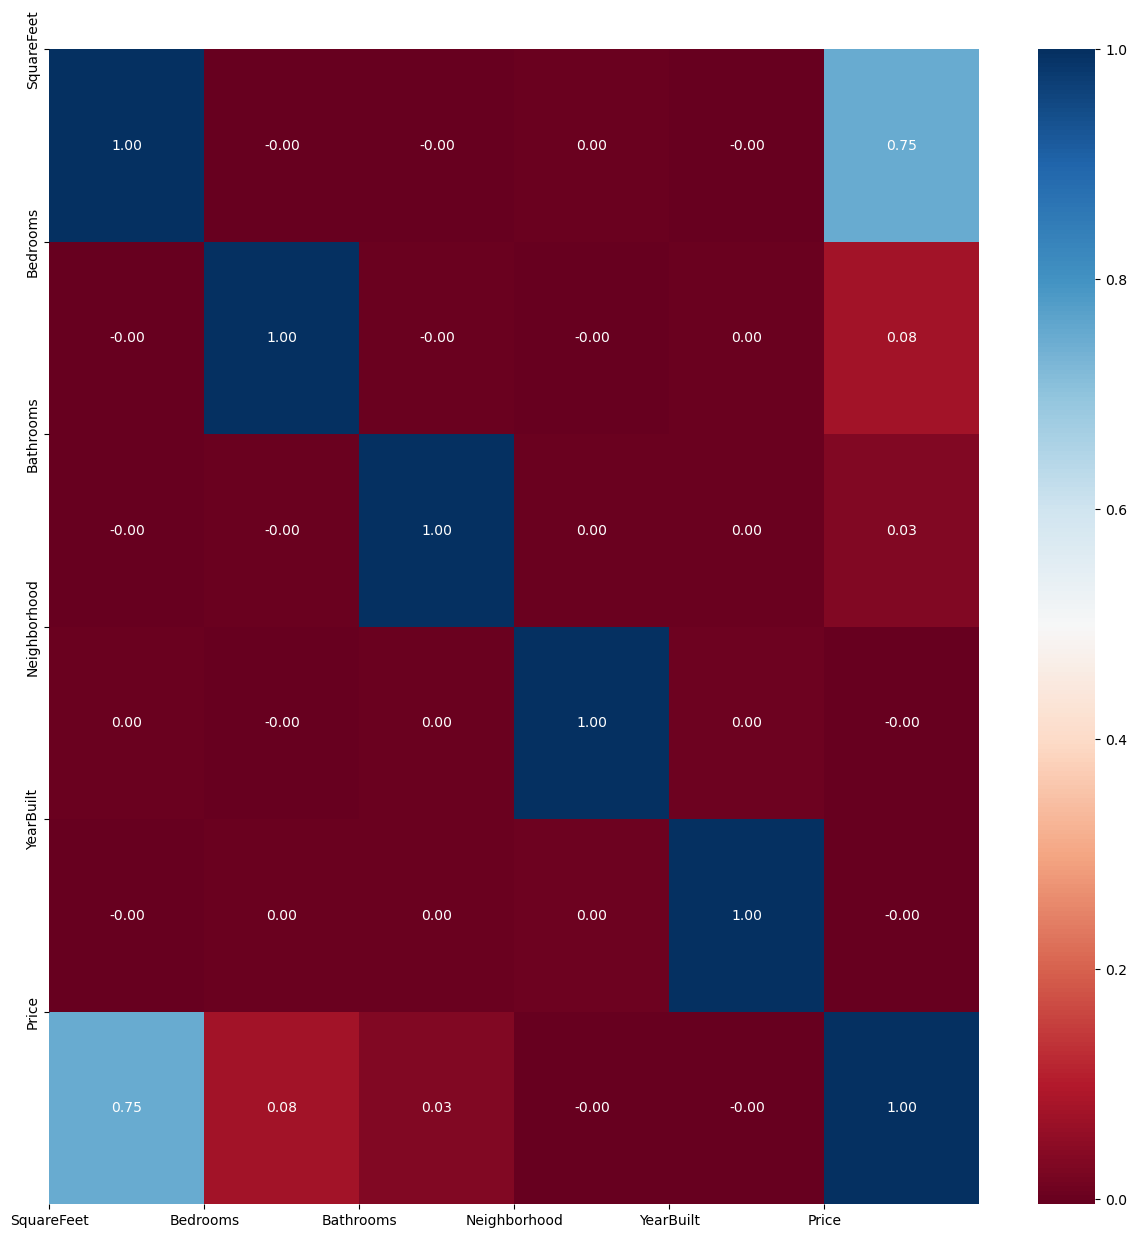

In [29]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

We use Heatmap to find relations between features. 

**Most related features :**
- SquareFeet : 0.75
- Neighborhood : -0.00
- YearBuilt : -0.00

In [30]:
X= train.drop(columns=['Price','Neighborhood','YearBuilt'],axis=1)
y= train['Price']

In [31]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler, MaxAbsScaler,QuantileTransformer
from sklearn.preprocessing import PowerTransformer,Normalizer,OrdinalEncoder,FunctionTransformer

In [32]:
X_train=X
y_train=y

StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2
0,0.855384,-1.348036,1.228934
1,0.650248,1.342476,1.228934
2,0.465973,1.342476,0.003431
3,0.363405,1.342476,-1.222072
4,0.125239,-1.348036,1.228934
...,...,...,...
39995,0.278221,1.342476,1.228934
39996,0.794538,0.445639,-1.222072
39997,1.401254,0.445639,0.003431
39998,0.316467,-0.451199,-1.222072


- Standardize all features, i.e. Gaussian distribution. The mean of the data is 0 and the variance is 1.The appropriate time to use standardization is when the variance of some features is too large, so that the model can be converged quickly

In [33]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (32000, 3)
Shape of X_eval:  (8000, 3)
Shape of y_train:  (32000,)
Shape of y_eval (8000,)


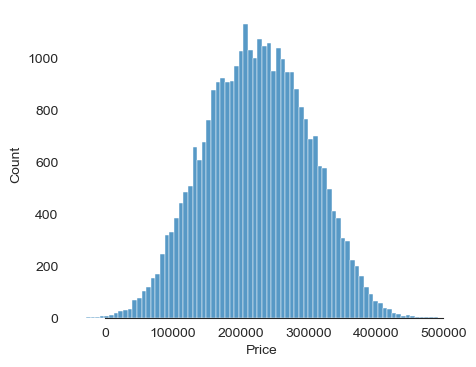

Skewness: -0.011181
Kurtosis: -0.394284


In [34]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(5, 4))
sns.histplot(y_train)
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

- Observe the distribution of the forecast target value. 

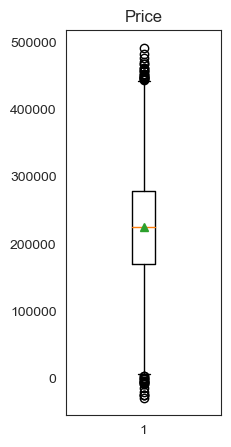

In [35]:
plt.figure(figsize=(2,5))
plt.boxplot(y_train,showmeans=True)
plt.title('Price')
plt.show()